# Feature Engineering

In [18]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv(r"RealEstate_Dataset [Cleaned].csv")
df.head()

,Property Title,Location,Bedrooms,Price,Size,Listing Type
0,115 m2 2 Bedrooms Apartments for Rent in Dhofa...,"Dhofar, Salala",2,45.0,115.0,For Rent
1,Furnished Daily in Dhofar Salala,"Dhofar, Salala",2,15.0,100.0,For Rent
2,900 m2 2 Bedrooms Apartments for Rent in Dhofa...,"Dhofar, Salala",2,25.0,900.0,For Rent
3,More than 6 bedrooms Chalet for Rent in Al Bat...,"Al Batinah, Suwaiq",2,70.0,5000.0,For Rent
4,60 m2 1 Bedroom Apartments for Rent in Dhofar ...,"Dhofar, Salala",1,45.0,60.0,For Rent


In [20]:
df.shape

(4176, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Property Title  4176 non-null   object 
 1   Location        4176 non-null   object 
 2   Bedrooms        4176 non-null   int64  
 3   Price           4176 non-null   float64
 4   Size            4176 non-null   float64
 5   Listing Type    4176 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 195.9+ KB


In [22]:
df.isnull().sum()

Property Title    0
Location          0
Bedrooms          0
Price             0
Size              0
Listing Type      0
dtype: int64

In [23]:
df["Price per sqm"] = df["Price"] / df["Size"]
df[["Price per sqm"]]

,Price per sqm
0,0.391304
1,0.150000
2,0.027778
3,0.014000
4,0.750000
...,...
4171,2.058824
4172,2.794118
4173,2.714286
4174,4.750000


In [24]:
df["Price per sqm"] = df["Price per sqm"].round(3)
df[["Price per sqm"]]

,Price per sqm
0,0.391
1,0.150
2,0.028
3,0.014
4,0.750
...,...
4171,2.059
4172,2.794
4173,2.714
4174,4.750


In [25]:
df.head()

,Property Title,Location,Bedrooms,Price,Size,Listing Type,Price per sqm
0,115 m2 2 Bedrooms Apartments for Rent in Dhofa...,"Dhofar, Salala",2,45.0,115.0,For Rent,0.391
1,Furnished Daily in Dhofar Salala,"Dhofar, Salala",2,15.0,100.0,For Rent,0.150
2,900 m2 2 Bedrooms Apartments for Rent in Dhofa...,"Dhofar, Salala",2,25.0,900.0,For Rent,0.028
3,More than 6 bedrooms Chalet for Rent in Al Bat...,"Al Batinah, Suwaiq",2,70.0,5000.0,For Rent,0.014
4,60 m2 1 Bedroom Apartments for Rent in Dhofar ...,"Dhofar, Salala",1,45.0,60.0,For Rent,0.750


In [26]:
df["is_studio"] = df["Bedrooms"] <= 1
df[["is_studio"]]

,is_studio
0,False
1,False
2,False
3,False
4,True
...,...
4171,False
4172,False
4173,False
4174,False


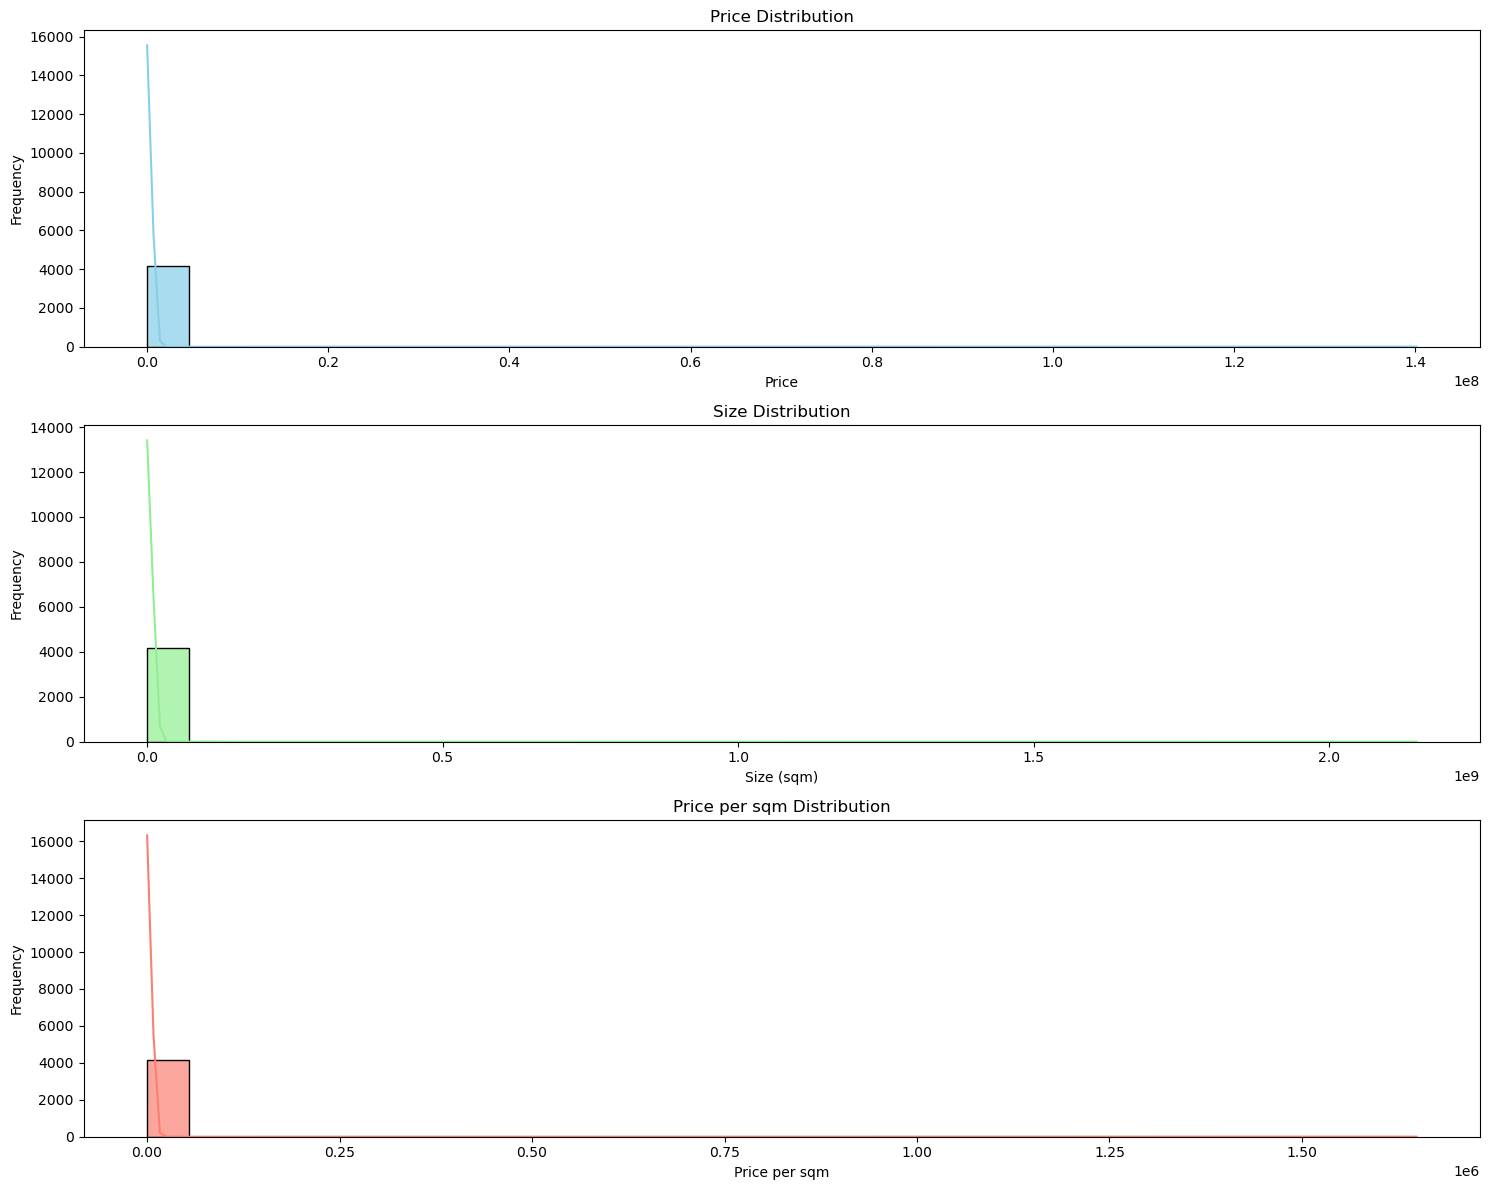

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

# Price Distribution
plt.subplot(3, 1, 1)
sns.histplot(df["Price"], bins=30, color="skyblue", alpha=0.7, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Size Distribution
plt.subplot(3, 1, 2)
sns.histplot(df["Size"], bins=30, color="lightgreen", alpha=0.7, kde=True)
plt.title("Size Distribution")
plt.xlabel("Size (sqm)")
plt.ylabel("Frequency")

# Price per sqm Distribution
plt.subplot(3, 1, 3)
sns.histplot(df["Price per sqm"], bins=30, color="salmon", alpha=0.7, kde=True)
plt.title("Price per sqm Distribution")
plt.xlabel("Price per sqm")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### `Log-transformed features` to handle extreme skew

In [28]:
df["log_price"] = np.log1p(df["Price"])
df["log_size"] = np.log1p(df["Size"])
df["log_price_per_sqm"] = np.log1p(df["Price per sqm"])

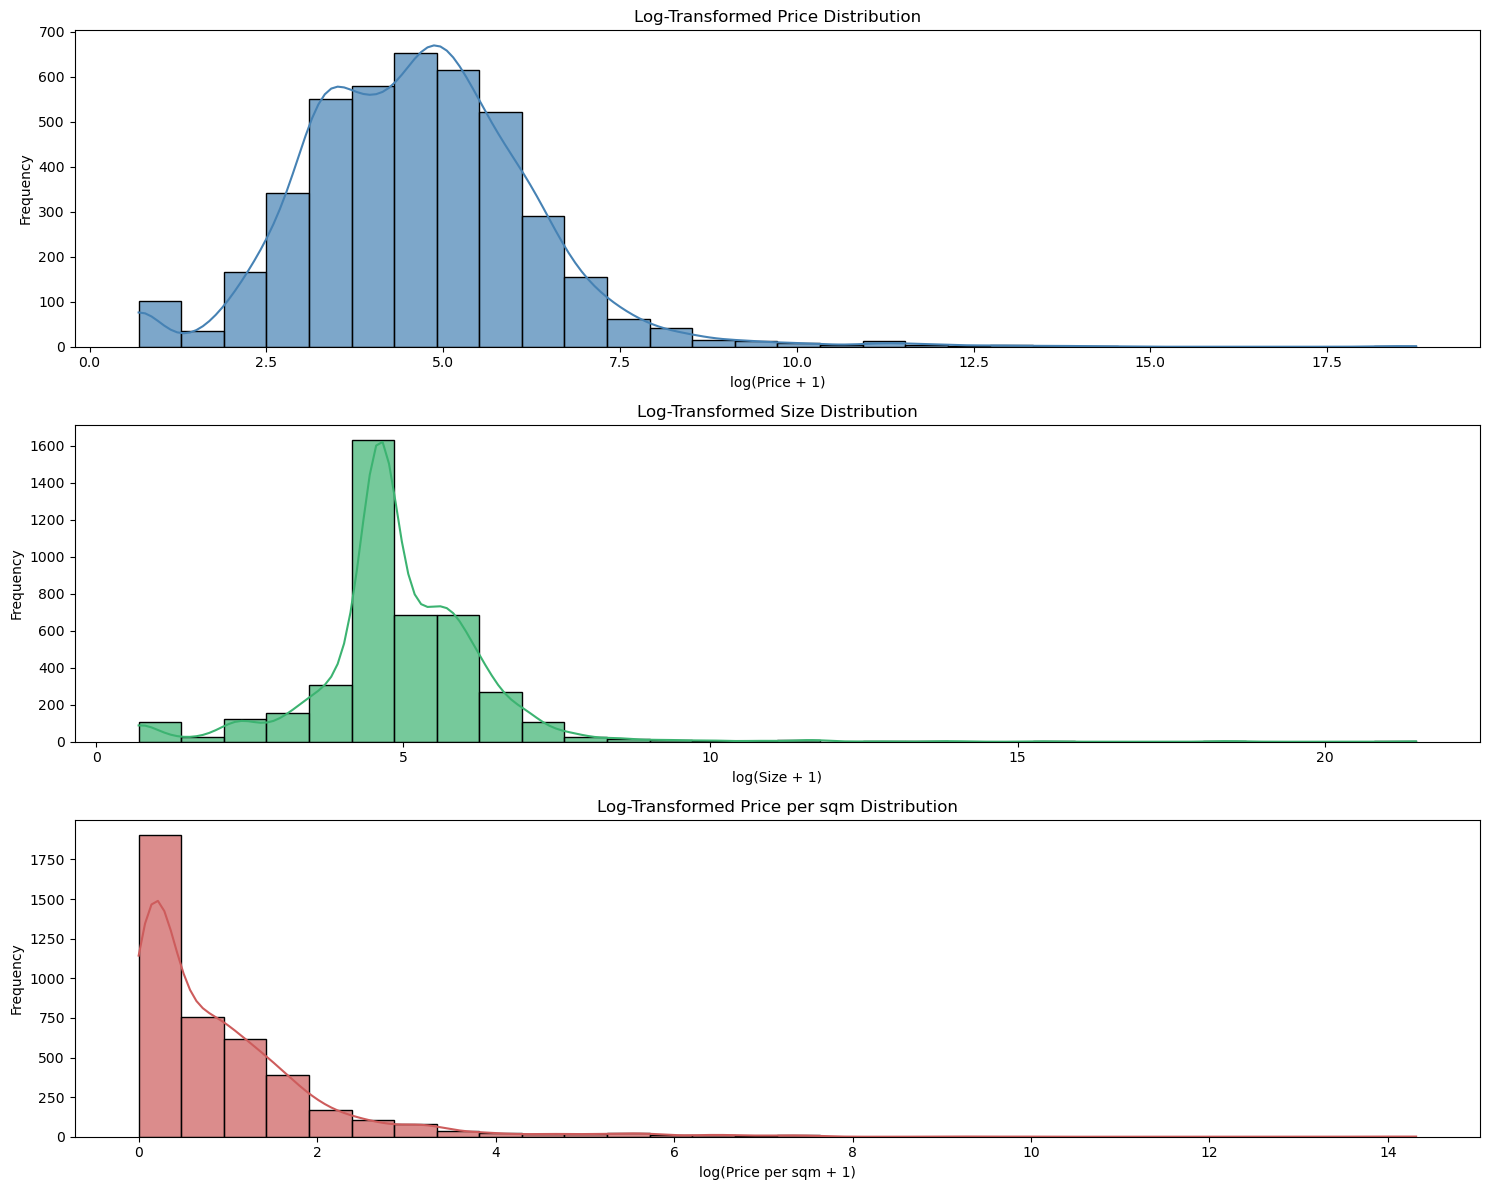

In [29]:
plt.figure(figsize=(15, 12))

# Plot 1: Log Price Distribution
plt.subplot(3, 1, 1)
sns.histplot(df["log_price"], bins=30, color="steelblue", alpha=0.7, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price + 1)")
plt.ylabel("Frequency")

# Plot 2: Log Size Distribution
plt.subplot(3, 1, 2)
sns.histplot(df["log_size"], bins=30, color="mediumseagreen", alpha=0.7, kde=True)
plt.title("Log-Transformed Size Distribution")
plt.xlabel("log(Size + 1)")
plt.ylabel("Frequency")

# Plot 3: Log Price per sqm Distribution
plt.subplot(3, 1, 3)
sns.histplot(df["log_price_per_sqm"], bins=30, color="indianred", alpha=0.7, kde=True)
plt.title("Log-Transformed Price per sqm Distribution")
plt.xlabel("log(Price per sqm + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Outliers

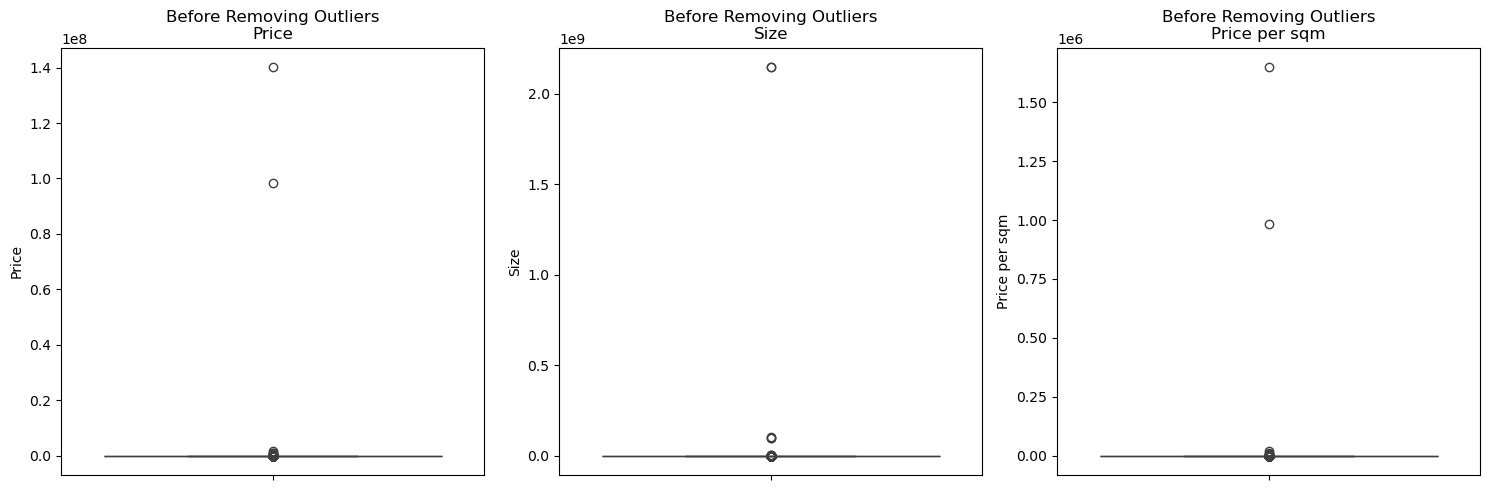

In [30]:
cols_to_check = ["Price", "Size", "Price per sqm"]

# Plot boxplots before removing outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Before Removing Outliers\n{col}')
plt.tight_layout()
plt.show()

#### Removing Outliers

In [31]:
# Remove outliers using IQR method for each column
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

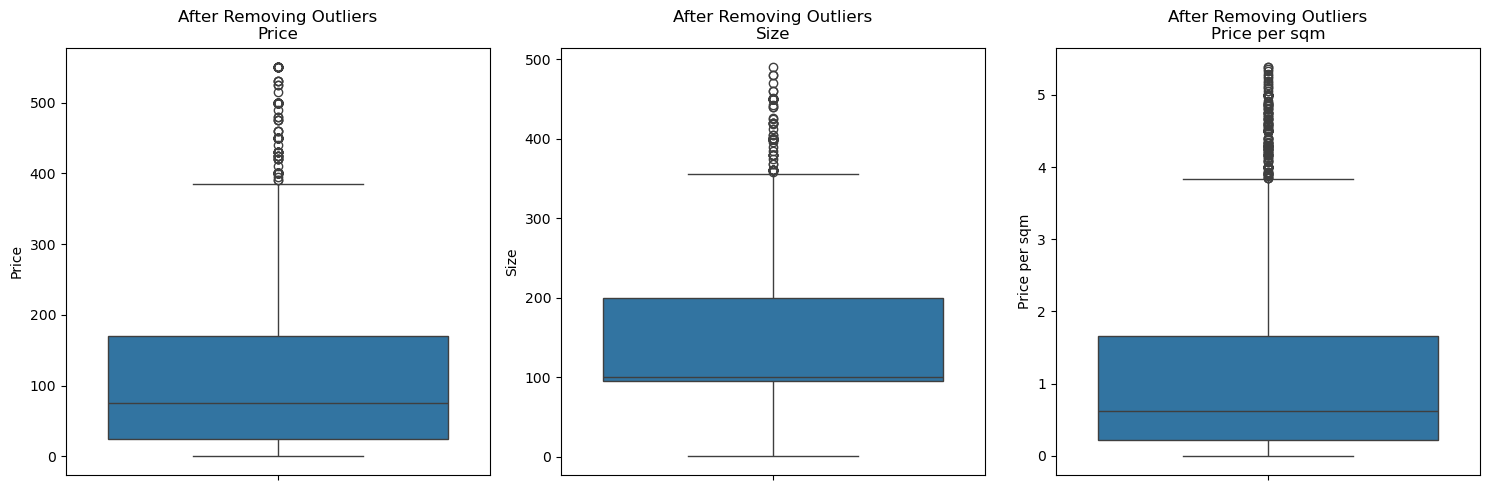

In [32]:
# Plot boxplots after removing outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'After Removing Outliers\n{col}')
plt.tight_layout()
plt.show()

#### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["Property Title", "Location", "Listing Type", "is_studio"]
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#### Standard Scalar

In [34]:
from sklearn.preprocessing import StandardScaler

num_features = ["Size", "Price per sqm", "log_price", "log_size", "log_price_per_sqm"]
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) from the DataFrame
X = df.drop("log_price", axis=1)
y = df["log_price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.09
R-squared (R2): 0.91
